In [ ]:
#Time series asignment 1

In [1]:
#import pyflux as pf
import numpy as np
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\anusha\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


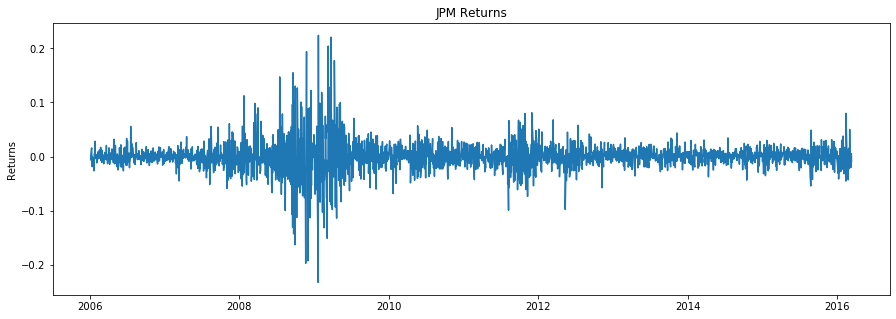

In [2]:
jpm = DataReader('JPM',  'yahoo', datetime(2006,1,1), datetime(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');

In [17]:
jpm.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.815792
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,27.655237
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,27.738998


In [18]:
returns.head(3)

,JPM Returns
2006-01-04,-0.005789
2006-01-05,0.003024
2006-01-06,0.007021


In [19]:
jpm.to_csv('D:\\Praxis\\TimeSeries\\jpm.csv') 

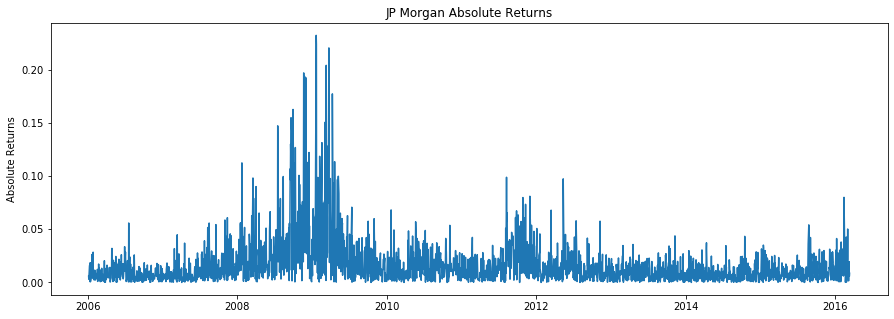

In [7]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

In [2]:
from arch import arch_model

In [5]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1,q=1)
x = model.fit()
x.summary()

NameError: name 'arch_model' is not defined

In [15]:
model = arch_model(returns, vol='GARCH', p=1,q=1)
x = model.fit()
x.summary()

C:\Users\anusha\Anaconda3\lib\site-packages\arch\univariate\base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007492. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
C:\Users\anusha\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      1,   Func. Count:      6,   Neg. LLF: -6572.966492168917
Iteration:      2,   Func. Count:     20,   Neg. LLF: -6576.692151637799
Iteration:      3,   Func. Count:     33,   Neg. LLF: -6576.692169800592
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6576.692166216101
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            JPM Returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                6576.69
Distribution:                  Normal   AIC:                          -13145.4
Method:            Maximum Likelihood   BIC:                          -13122.0
                                        No. Observations:                 2563
Date:                Sun, Jan 12 2020   Df Residuals:                     2559
Time:                        15:14:58   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0344e-03  2.883e-04      3.587  3.342e-04 [4.692e-04,1.600e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.4984e-05  5.804e-12  2.582e+06      0.000 [1.498e-05,1.498e-05]
alpha[1]       0.2000  2.631e-02      7.601  2.933e-14     [  0.148,  0.252]
beta[1]        0.7800  1.882e-02     41.444      0.000     [  0.743,  0.817]
============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Positive directional derivative for linesearch. See convergence_flag.
"""